In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestRegressor

In [2]:
df1=pd.read_csv("finalcsvforageandstate1.csv")

In [3]:
df1

,Unnamed: 0,index,Date,Age_Bracket,State/UnionTerritory,Sno,Time,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,ChangePercent,vulnareable
0,0,4,2020-04-03,55,Haryana,598.0,6:00 PM,-,-,24.0,0.0,49.0,0.750000,2
1,1,5,2020-04-03,55,Haryana,598.0,6:00 PM,-,-,24.0,0.0,49.0,0.750000,2
2,2,6,2020-04-03,55,Haryana,598.0,6:00 PM,-,-,24.0,0.0,49.0,0.750000,2
3,3,7,2020-04-03,55,Haryana,598.0,6:00 PM,-,-,24.0,0.0,49.0,0.750000,2
4,4,8,2020-04-03,55,Haryana,598.0,6:00 PM,-,-,24.0,0.0,49.0,0.750000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98365,98365,108025,2020-06-08,58,Karnataka,2790.0,8:00 AM,-,-,2132.0,61.0,5452.0,1.152388,2
98366,98366,108026,2020-06-08,69,Karnataka,2790.0,8:00 AM,-,-,2132.0,61.0,5452.0,1.152388,2
98367,98367,108027,2020-06-08,80,Karnataka,2790.0,8:00 AM,-,-,2132.0,61.0,5452.0,1.152388,2
98368,98368,108028,2020-06-08,52,Karnataka,2790.0,8:00 AM,-,-,2132.0,61.0,5452.0,1.152388,2


In [4]:
df1=df1[["Date","Age_Bracket","State/UnionTerritory","Sno","Time","ConfirmedIndianNational","ConfirmedForeignNational","Cured","Deaths","Confirmed","ChangePercent","vulnareable"]]

In [5]:
df1

,Date,Age_Bracket,State/UnionTerritory,Sno,Time,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,ChangePercent,vulnareable
0,2020-04-03,55,Haryana,598.0,6:00 PM,-,-,24.0,0.0,49.0,0.750000,2
1,2020-04-03,55,Haryana,598.0,6:00 PM,-,-,24.0,0.0,49.0,0.750000,2
2,2020-04-03,55,Haryana,598.0,6:00 PM,-,-,24.0,0.0,49.0,0.750000,2
3,2020-04-03,55,Haryana,598.0,6:00 PM,-,-,24.0,0.0,49.0,0.750000,2
4,2020-04-03,55,Haryana,598.0,6:00 PM,-,-,24.0,0.0,49.0,0.750000,2
...,...,...,...,...,...,...,...,...,...,...,...,...
98365,2020-06-08,58,Karnataka,2790.0,8:00 AM,-,-,2132.0,61.0,5452.0,1.152388,2
98366,2020-06-08,69,Karnataka,2790.0,8:00 AM,-,-,2132.0,61.0,5452.0,1.152388,2
98367,2020-06-08,80,Karnataka,2790.0,8:00 AM,-,-,2132.0,61.0,5452.0,1.152388,2
98368,2020-06-08,52,Karnataka,2790.0,8:00 AM,-,-,2132.0,61.0,5452.0,1.152388,2


In [6]:
df1=df1[['Age_Bracket','State/UnionTerritory','vulnareable']]

In [7]:
from sklearn import preprocessing
import numpy as np

le = preprocessing.LabelEncoder()
df1['State/UnionTerritory_cat']=le.fit_transform(df1['State/UnionTerritory'])

C:\Users\prath\AppData\Local\Temp/ipykernel_4652/3039228949.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['State/UnionTerritory_cat']=le.fit_transform(df1['State/UnionTerritory'])


In [8]:
df1

,Age_Bracket,State/UnionTerritory,vulnareable,State/UnionTerritory_cat
0,55,Haryana,2,9
1,55,Haryana,2,9
2,55,Haryana,2,9
3,55,Haryana,2,9
4,55,Haryana,2,9
...,...,...,...,...
98365,58,Karnataka,2,13
98366,69,Karnataka,2,13
98367,80,Karnataka,2,13
98368,52,Karnataka,2,13


In [9]:
states=df1[["State/UnionTerritory","State/UnionTerritory_cat"]]

In [10]:
states

,State/UnionTerritory,State/UnionTerritory_cat
0,Haryana,9
1,Haryana,9
2,Haryana,9
3,Haryana,9
4,Haryana,9
...,...,...
98365,Karnataka,13
98366,Karnataka,13
98367,Karnataka,13
98368,Karnataka,13


In [11]:
df = states.drop_duplicates()


In [12]:
df

,State/UnionTerritory,State/UnionTerritory_cat
0,Haryana,9
14,Rajasthan,22
15,Uttar Pradesh,27
17,Delhi,6
19,Ladakh,15
21,Tamil Nadu,24
22,Kerala,14
28,Jammu and Kashmir,11
29,Karnataka,13
37,Maharashtra,16


In [13]:
df1['State/UnionTerritory'].unique()

array(['Haryana', 'Rajasthan', 'Uttar Pradesh', 'Delhi', 'Ladakh',
       'Tamil Nadu', 'Kerala', 'Jammu and Kashmir', 'Karnataka',
       'Maharashtra', 'Andhra Pradesh', 'Telengana', 'Punjab',
       'Uttarakhand', 'Odisha', 'West Bengal', 'Gujarat', 'Chhattisgarh',
       'Bihar', 'Puducherry', 'Tripura', 'Jharkhand', 'Assam',
       'Himachal Pradesh', 'Manipur', 'Mizoram',
       'Dadra and Nagar Haveli and Daman and Diu', 'Goa', 'Sikkim',
       'Arunachal Pradesh'], dtype=object)

In [14]:
df1=df1[['Age_Bracket','State/UnionTerritory_cat','vulnareable']]

In [15]:
df1

,Age_Bracket,State/UnionTerritory_cat,vulnareable
0,55,9,2
1,55,9,2
2,55,9,2
3,55,9,2
4,55,9,2
...,...,...,...
98365,58,13,2
98366,69,13,2
98367,80,13,2
98368,52,13,2


In [16]:
k=df1[df1[['Age_Bracket']].apply(lambda x: x[0].isdigit() or x[0].replace('.', '', 1).isdigit(), axis=1)]

In [17]:
k['Age_Bracket'].unique()

array(['55', '70', '45', '16', '27', '59', '65', '75', '24', '54', '53',
       '61', '25', '63', '46', '3', '48', '40', '47', '13', '96', '89',
       '85', '68', '69', '26', '33', '29', '52', '22', '34', '44', '20',
       '30', '38', '49', '51', '35', '21', '32', '58', '37', '41', '18',
       '60', '2', '42', '74', '28', '17', '36', '39', '23', '19', '31',
       '64', '43', '50', '62', '56', '73', '57', '9', '7', '1', '11',
       '76', '67', '66', '92', '72', '15', '77', '81', '10', '78', '80',
       '90', '12', '71', '5', '4', '14', '8', '6', '1.5', '48.0', '55.0',
       '57.0', '58.0', '66.0', '32.0', '2.0', '40.0', '28.0', '50.0',
       '64.0', '17.0', '13.0', '30.0', '19.0', '24.0', '7.0', '36.0',
       '27.0', '25.0', '21.0', '47.0', '10.0', '34.0', '38.0', '14.0',
       '22.0', '23.0', '26.0', '45.0', '16.0', '18.0', '60.0', '12.0',
       '67.0', '29.0', '61.0', '80.0', '39.0', '31.0', '20.0', '37.0',
       '54.0', '42.0', '43.0', '35.0', '33.0', '46.0', '70.0', '0.4

In [18]:
k

,Age_Bracket,State/UnionTerritory_cat,vulnareable
0,55,9,2
1,55,9,2
2,55,9,2
3,55,9,2
4,55,9,2
...,...,...,...
98365,58,13,2
98366,69,13,2
98367,80,13,2
98368,52,13,2


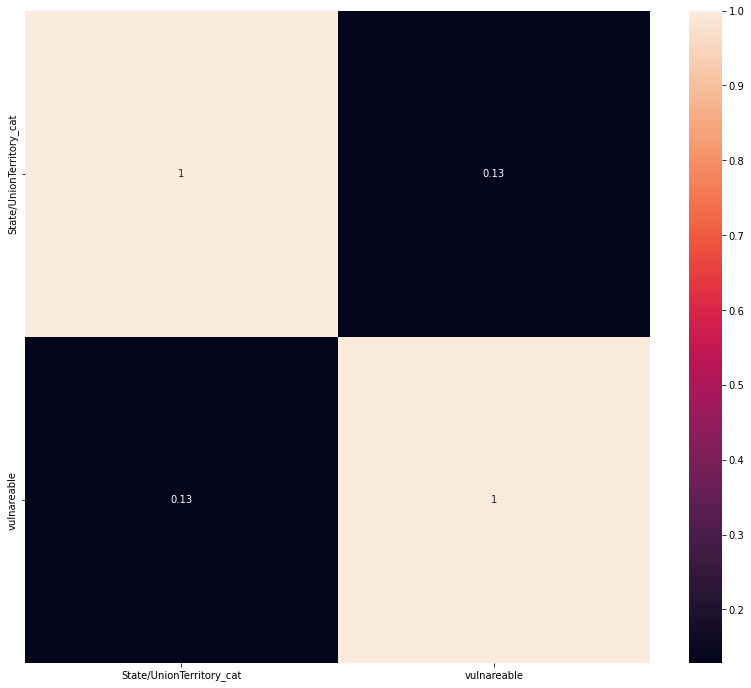

In [19]:
plt.figure(figsize=(14,12))
sns.heatmap(k.corr(), annot=True)
plt.show()

In [20]:
k['Age_Bracket'].unique()

array(['55', '70', '45', '16', '27', '59', '65', '75', '24', '54', '53',
       '61', '25', '63', '46', '3', '48', '40', '47', '13', '96', '89',
       '85', '68', '69', '26', '33', '29', '52', '22', '34', '44', '20',
       '30', '38', '49', '51', '35', '21', '32', '58', '37', '41', '18',
       '60', '2', '42', '74', '28', '17', '36', '39', '23', '19', '31',
       '64', '43', '50', '62', '56', '73', '57', '9', '7', '1', '11',
       '76', '67', '66', '92', '72', '15', '77', '81', '10', '78', '80',
       '90', '12', '71', '5', '4', '14', '8', '6', '1.5', '48.0', '55.0',
       '57.0', '58.0', '66.0', '32.0', '2.0', '40.0', '28.0', '50.0',
       '64.0', '17.0', '13.0', '30.0', '19.0', '24.0', '7.0', '36.0',
       '27.0', '25.0', '21.0', '47.0', '10.0', '34.0', '38.0', '14.0',
       '22.0', '23.0', '26.0', '45.0', '16.0', '18.0', '60.0', '12.0',
       '67.0', '29.0', '61.0', '80.0', '39.0', '31.0', '20.0', '37.0',
       '54.0', '42.0', '43.0', '35.0', '33.0', '46.0', '70.0', '0.4

In [36]:
x = k[['Age_Bracket','State/UnionTerritory_cat']]#Independent Variable
y = k['vulnareable']# Dependent Variable
x_train,x_test , y_train, y_test = train_test_split(x,y,test_size=0.2)

In [38]:
from sklearn.linear_model import LogisticRegression#(logistic Fuction)

lr = LogisticRegression()

lr.fit(x_train,y_train)

Y_pred_lr = lr.predict(x_test)
score_lr = round(accuracy_score(Y_pred_lr,y_test)*100,2)
score_lr

65.7

In [39]:

#import pickle
#with open('classification_by_Logistic_Regression','wb') as f:
#    pickle.dump(lr,f)

<AxesSubplot:title={'center':'LogisticRegression_cm'}>

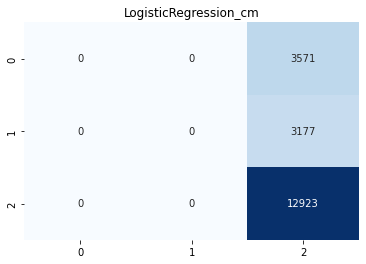

In [40]:
lr_cm=confusion_matrix(y_test,Y_pred_lr)
plt.title("LogisticRegression_cm")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [41]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(x_train,y_train)

Y_pred_nb = nb.predict(x_test)
score_nb = round(accuracy_score(Y_pred_nb,y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 65.63 %


<AxesSubplot:title={'center':'NaiveBayes_cm'}>

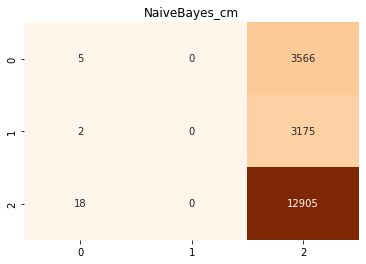

In [42]:
nb_cm=confusion_matrix(y_test,Y_pred_nb)
plt.title("NaiveBayes_cm")
sns.heatmap(nb_cm,annot=True,cmap="Oranges",fmt="d",cbar=False)

In [29]:
#import pickle
#with open('classification_by_Naive_Bayes','wb') as f:
#    pickle.dump(nb,f)

In [30]:
from sklearn import svm

sv = svm.SVC(kernel='rbf')

sv.fit(x_train, y_train)

Y_pred_svm = sv.predict(x_test)
score_svm = round(accuracy_score(Y_pred_svm,y_test)*100,2)

print("The accuracy score achieved using RBF SVM is: "+str(score_svm)+" %")

The accuracy score achieved using RBF SVM is: 66.12 %


<AxesSubplot:title={'center':'SVM_Classification_cm'}>

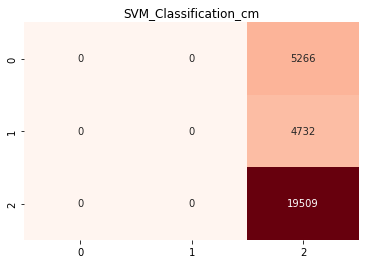

In [31]:
sv_cm=confusion_matrix(y_test,Y_pred_svm)
plt.title("SVM_Classification_cm")
sns.heatmap(sv_cm,annot=True,cmap="Reds",fmt="d",cbar=False)

In [32]:
from sklearn import svm

sv1 = svm.SVC(kernel='poly')

sv1.fit(x_train, y_train)

Y_pred_svm = sv1.predict(x_test)
score_svm = round(accuracy_score(Y_pred_svm,y_test)*100,2)

print("The accuracy score achieved using Poly SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Poly SVM is: 66.12 %


<AxesSubplot:title={'center':'SVM_Classification_cm'}>

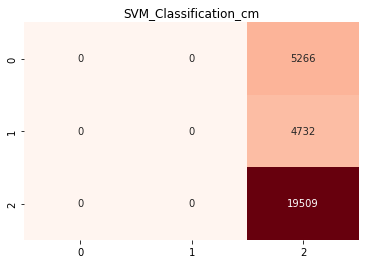

In [33]:
sv_cm=confusion_matrix(y_test,Y_pred_svm)
plt.title("SVM_Classification_cm")
sns.heatmap(sv_cm,annot=True,cmap="Reds",fmt="d",cbar=False)

In [34]:
from sklearn.ensemble import RandomForestClassifier
# Train model - Using original imbalanced dataset at first
clf_4 = RandomForestClassifier()
clf_4.fit(x_train, y_train)
pred_y_4 = clf_4.predict(x_test)
print(accuracy_score(y_test, pred_y_4))

0.6603517809333379
